## 프로젝트 - 뉴스 카테고리 다중분류
### Reuters_Classification
***
### Step 1. 로이터 뉴스데이터
-로이터 뉴스데이터를 확인해 봅시다.  
-정수로 된 데이터들을 다시 문장으로 복원하고 이를 다시 벡터화해 봅시다.

### Step 2. 다양한 분류모델 사용해보기
-나이브 베이즈 분류기, F1-Score, Confusion Matrix, 머신러닝 모델 등 다양한 분류 모델을 사용해 봅시다.

### Step 3. Vocabulry Size를 변경해보기
-뉴스데이터를 확인할 때 지정해 주었던 Vocabulry Size를 변경하여 분류모델을 사용해 봅시다.  
-공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

### Step 4. 딥러닝 모델과 비교해보기
-RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 비교해봅시다.  
-공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.
***
### 평가문항
**1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?**  
-3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.  

**2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?**  
-Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.  

**3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?**  
-동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.  
***
### Step 1. 로이터 뉴스데이터
-로이터 뉴스데이터를 확인해 봅시다.  
-정수로 된 데이터들을 다시 문장으로 복원하고 이를 다시 벡터화해 봅시다.
***
**-데이터 확인해보기**

In [1]:
# 라이브러리 가져오기
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 훈련 데이터와 테스트 데이터 로드하기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
# 로이터 데이터에서 단어사전 길이 10000개로 설정하여 훈련:테스트 비율 8:2로 가져오기

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


-문자형식으로 되어있는 것이 아니라 정수로 변환되어있는 형태로 데이터가 출력된다.

In [5]:
print(y_train[0])
print(y_test[0])

3
3


-레이블 또한 정수로 되어있다.

In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


-전체 클래스의 수는 46개이다.

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


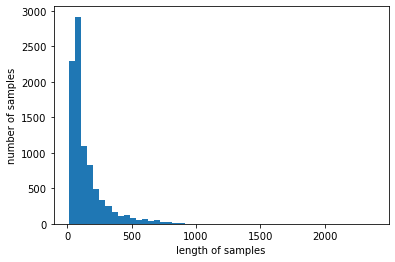

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

-훈련용 뉴스의 길이가 0~250사이에 몰려있는것을 확인할 수 있다.

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

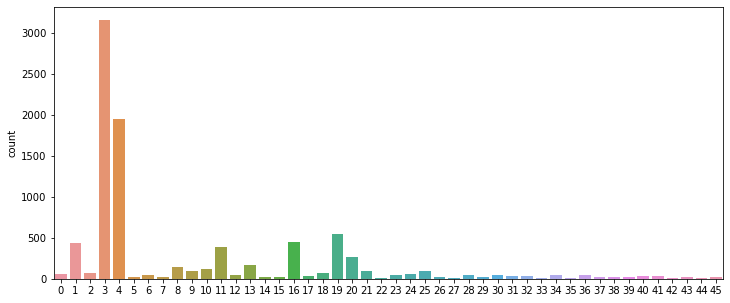

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


-각 클래스의 빈도수를 확인해본 결과, 3번 4번 클래스에 대부분의 결과값이 모여있는 것을 확인할 수 있다.
***
**-문장 복원하기**

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

-단어를 key값으로 고유한 정수를 value값으로 가지는 word to index dictionary는 로이터 뉴스데이터에서 제공해준다.  
-우리는 이를 가지고 정수를 key값으로 단어를 value값으로 같는 index to word dictionary를 만들어서 문장을 복원한다.

In [11]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

-로이터 뉴스데이터의 word to index dictionary는 \<PAD>, \<SOS>, \<UNK> 3개의 토큰이 생략되어있다.  
-따라서 index번호에 +3을 해주어야한다.

In [12]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

-위에서 index+3으로 key값을 지정해주게 되면서 0에서 2까지의 key/value는 존재하지 않는 dictionary가 되었다.  
-0에서 2까지의 value는 \<PAD>, \<SOS>, \<UNK>이므로 이를 추가해준다.

In [13]:
print(x_train[0])
print(' '.join([index_to_word[index] for index in x_train[0]]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


-첫 번째 훈련용 뉴스기사를 원래의 문장으로 변환하였다.  
-단어사전의 길이가 부족하여 없는 단어로 변경된 단어들도 있지만 대체로 잘 복원되었다.

In [14]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [15]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [16]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [17]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

-학습데이터, 테스트데이터 모두 정수->문장으로 잘 복원되었다.
***
**-벡터화 하기**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer #빈도수 행렬을 위한 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer #빈도수-역빈도수를 활용한 행렬을 만들기 위한 라이브러리

In [19]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


-빈도수 행렬을 만들어줍니다.  


In [20]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


-빈도수 행렬을 가지고 역빈도수 행렬을 만들어줍니다.
***
### Step 2. 다양한 분류모델 사용해보기
-나이브 베이즈 분류기, F1-Score, Confusion Matrix, 머신러닝 모델 등 다양한 분류 모델을 사용해 봅시다.
***
**-나이브 베이즈 분류기**

In [21]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [22]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [23]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제

정확도: 0.6567230632235085


1) 나이브 베이즈 분류기 accuracy : 65.67%  
***
**-Confusion Matrix & F1-Score**

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

-Accuracy는 가장 직관적이고 모델의 성능을 나타낼 수 있는 평가지표이다.  
-하지만 데이터의 라벨이 불균형 구조인 경우를 제대로 고려하지 못한다.  
-Cofusion Matrix는 성능평가에 사용되는 지표로서 TP(True Positive), FN(False Negative), FP(False Positive), TN(True Negative)를 활용하여  
-Precision(True라고 예측한 것들 중 실제 True의 비율), Recall(실제 True인 것들 중에서 True로 예측한 것의 비율), Specificity(False라고 예측한 것들 중 실제 False의 비율)의 지표를 만들어 낸다.  
-F1-Score는 Confusion Matrix의 지표들 중 Precision과 Recall을 활용하여 평가한다.

In [25]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

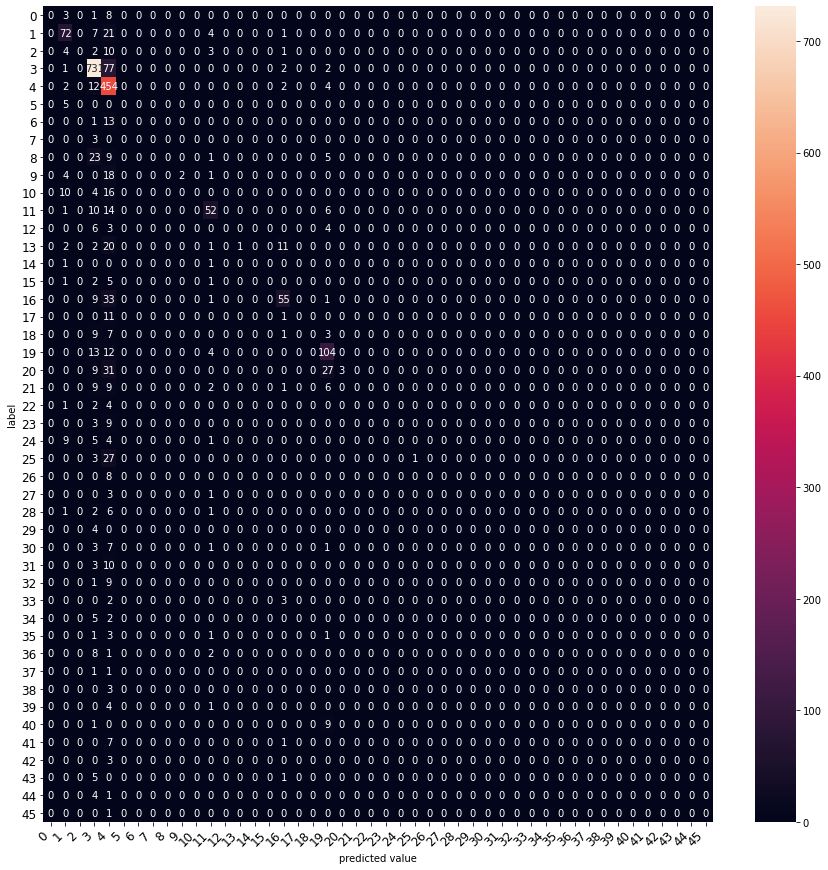

In [26]:
graph_confusion_matrix(mod, tfidfv_test, y_test)

-Confusion Matrix를 시각화해보았다. 이제 F1-Score를 구해보자

In [27]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%
***
**-머신러닝 모델 Complement Naive Bayes Classifier(CNB)**  
-일반적인 나이브 베이즈 분류기는 데이터가 특정 클래스에 치우쳐져 있을 경우에 문제가 생길 수 있다.  
-이를 보완한 것이 컴플리먼트 나이브 베이즈 분류기이다.  
-이 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있다.

In [28]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [29]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
***
**-머신러닝 모델 로지스틱 회귀(Logistic Regression)**  
-로지스틱 회귀는 각 클래수가 정답일 확률을 표현하도록 학습하는 모델이다.  
-소프트맥스 회귀라고도 부른다.  
-이름은 회귀이지만 분류를 수행한다.  

In [30]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [31]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8076580587711487


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  
3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
***
**-머신러닝 모델 선형 서포트 벡터 머신(Linear Support Vector Machine;Linear SVM)**  
-선형 서포트 벡터 머신은 클래스를 이진분류하는 결정범위(Decision boundary)에서 가장 가까운 서포틑 벡터를 기준으료 데이터를 분류하는 방법이다.  
-원래는 이진분류 방법이지만 클래스의 수만큼 이진분류 모델을 만든다면 다중분류도 가능하다.  
-예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.  

In [32]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [33]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7813891362422084


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
5) 선형 서포트 벡터 머신 accuracy : 78.14%
***
**-머신러닝 모델 결정 트리(Decision Tree)**  
-결정트리는 기본적으로 예/아니오 질문을 이어나가면서 학습한다.  
-그 질문을 이어나가는 방식이 나무와 닯아서 결정트리라고 부른다.  
-트리계열의 모델은 고차원+희소한데이터인 경우 성능이 잘 나오지 않는다.  

In [34]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [35]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
5) 선형 서포트 벡터 머신 accuracy : 78.14%  
6) 결정트리 accuracy : 62.02%  
***
**-머신러닝 모델 랜덤 포레스트(Random Forest)**  
-랜덤 포레스트 모델은 위의 결정트리 여러개를 앙상블한 방법이다.

In [36]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [37]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
5) 선형 서포트 벡터 머신 accuracy : 78.14%  
6) 결정트리 accuracy : 62.02%  
7) 랜덤 포레트스 accuracy : 67.41%  
***
**-머신러닝 모델 그래디언트 부스팅 트리(GradientBoostingClassifier)**  
-그래디언트 부스팅 트리는 랜덤포레스트와 같이 앙상블 모델이다.  
-하지만 이전트리의 오차를 보완하는 방식으로 트리를 만든다.  
-일부 특성을 무시한다는 특징을 가지고 있다.  

In [38]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7666963490650045


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
5) 선형 서포트 벡터 머신 accuracy : 78.14%  
6) 결정트리 accuracy : 62.02%  
7) 랜덤 포레트스 accuracy : 67.41%  
8) 그래디언트 부스팅 트리 accuracy : 76.67%  
***
**-머신러닝 모델 앙상블-보팅(Voting)**  
-보팅은 앙상블의 기법 중에 하나로 '하드 보팅'과 '소프트 보팅'이 있다.  
-하드 보팅은 예측 결과값 하나만 가지고 많게 예측한 값을 결과값으로 차용하는 것이다.  
-소프트 보팅은 예측 결과값을 라벨별로 확률값으로 받아 평균값을 결과값으로 차용하는 것이다.  

In [40]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [41]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498


1) 나이브 베이즈 분류기 accuracy : 65.67%  
2) F1-Score accuracy : 66%  

3) 컴플리먼트 나이브 베이즈 분류기 accuracy : 77.07%  
4) 로지스틱 회귀 accuracy : 80.77%  
5) 선형 서포트 벡터 머신 accuracy : 78.14%  
6) 결정트리 accuracy : 62.02%  
7) 랜덤 포레트스 accuracy : 67.41%  
8) 그래디언트 부스팅 트리 accuracy : 76.67%  
9) 앙상블-보팅 accuracy : 81.17%  
***
### Step 3. Vocabulry Size를 변경해보기
-뉴스데이터를 확인할 때 지정해 주었던 Vocabulry Size를 변경하여 분류모델을 사용해 봅시다.  
-공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.
***
**-모델 학습을 위한 함수**

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = {index + 3 : word for word, index in word_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
def get_data(data):
    decoded = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded.append(t)
    return decoded

def get_whole_data(x_train, y_train, x_test, y_test):
    dtmvector = CountVectorizer()
    x_train = get_data(x_train)
    x_test = get_data(x_test)
    x_train_dtm = dtmvector.fit_transform(x_train)
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
    return x_train, y_train, x_train_dtm,tfidfv, x_test_dtm, tfidfv_test,x_test, y_test

def NB(tfidfv, y_train, tfidfv_test, y_test):
    mod = MultinomialNB() 
    fit = mod.fit(tfidfv, y_train)
    predicted = mod.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result, predicted
    
def F1(y_test, predicted):
    result = classification_report(y_test, predicted)
    return result

def CB(tfidfv, y_train, tfidfv_test, y_test):
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    predicted = cb.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result

def LR(tfidfv, y_train, tfidfv_test, y_test):
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)
    predicted = lr.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result

def LSVC(tfidfv, y_train, tfidfv_test, y_test):
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    predicted = lsvc.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result
    
def DT(tfidfv, y_train, tfidfv_test, y_test):
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    predicted = tree.predict(tfidfv_test) 
    result = accuracy_score(y_test, predicted)*100
    return result

def RDT(tfidfv, y_train, tfidfv_test, y_test):
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    predicted = forest.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result

def GBC(tfidfv, y_train, tfidfv_test, y_test):
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)
    predicted = grbt.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result

def VOT(tfidfv, y_train, tfidfv_test, y_test):
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    predicted = voting_classifier.predict(tfidfv_test)
    result = accuracy_score(y_test, predicted)*100
    return result

def CNN_pre(index_to_word):
    vocab_size = len(index_to_word)
    word_vector_dim = 300
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(keras.layers.Conv1D(16, 7, activation='relu'))
    model.add(keras.layers.MaxPooling1D(5))
    model.add(keras.layers.Conv1D(16, 7, activation='relu'))
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

def CNN(model, x_train, y_train, x_test, y_test):
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=777)
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

    result = model.evaluate(x_test,  y_test, verbose=2)
    return result


def get_result(x_train, y_train, x_test, y_test) :
    x_train, y_train, x_train_dtm, tfidfv, x_test_dtm, tfidfv_test,x_test, y_test = get_whole_data(x_train, y_train, x_test, y_test)
    NB_result, predicted = NB(tfidfv, y_train, tfidfv_test, y_test)
    F1_result = F1(y_test, predicted)
    CB_result = CB(tfidfv, y_train, tfidfv_test, y_test)
    LR_result = LR(tfidfv, y_train, tfidfv_test, y_test)
    LSVC_result = LSVC(tfidfv, y_train, tfidfv_test, y_test)
    DT_result = DT(tfidfv, y_train, tfidfv_test, y_test)
    RDT_result = RDT(tfidfv, y_train, tfidfv_test, y_test)
    GBC_result = GBC(tfidfv, y_train, tfidfv_test, y_test)
    VOT_result = VOT(tfidfv, y_train, tfidfv_test, y_test)
    #model = CNN_pre(index_to_word)
    #CNN_result = CNN(model, x_train, y_train, x_test, y_test)
    
    
    print('나이브 베이즈 정확도 : {}%'.format(np.int64(NB_result)))
    print('F1-Score 결과값 : \n{}'.format(F1_result))
    print('컴플리먼트 나이브 베이즈 정확도 : {}%'.format(np.int64(CB_result)))
    print('로지스틱 회귀 정확도 : {}%'.format(np.int64(LR_result)))
    print('선형 서브 벡터 머신 정확도 : {}%'.format(np.int64(LSVC_result)))
    print('결정나무 정확도 : {}%'.format(np.int64(DT_result)))
    print('랜덤포레스트 정확도 : {}%'.format(np.int64(RDT_result)))
    print('그래디언트 부스팅 트리 정확도 : {}%'.format(np.int64(GBC_result)))
    print('앙상블-보팅 정확도 : {}%'.format(np.int64(VOT_result)))
    #print('1D-CNN 결과값 : \n{}%'.format(CNN_result))

def Deep(x_train, y_train, x_test, y_test) :
    max_len = 300
    X_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre')
    X_test = pad_sequences(x_test, maxlen=max_len, padding = 'pre')
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    model = keras.Sequential()
    model.add(keras.layers.Embedding(5000, 120))
    model.add(keras.layers.LSTM(100))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(46, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test))
    model_results = model.evaluate(X_test,  y_test, verbose=2)
    print(model_results)

In [43]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data(num_words=None, test_split=0.2)
get_result(x_train_all, y_train_all,x_test_all, y_test_all)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricW

나이브 베이즈 정확도 : 59%
F1-Score 결과값 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29    

In [44]:
(x_train_hf, y_train_hf), (x_test_hf, y_test_hf) = reuters.load_data(num_words=5000, test_split=0.2)
get_result(x_train_hf, y_train_hf,x_test_hf, y_test_hf)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricW

나이브 베이즈 정확도 : 67%
F1-Score 결과값 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62    

In [45]:
(x_train_db, y_train_db), (x_test_db, y_test_db) = reuters.load_data(num_words=20000, test_split=0.2)
get_result(x_train_db, y_train_db,x_test_db, y_test_db)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricW

나이브 베이즈 정확도 : 61%
F1-Score 결과값 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.39      0.52       105
           2       0.00      0.00      0.00        20
           3       0.75      0.92      0.82       813
           4       0.46      0.96      0.62       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.76      0.37      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.74      0.28      0.41    

-모든 단어 사용, 빈도수 상위 5000개의 단어만 사용, 직접 단어 갯수를 설정(20000개)해서 사용해본 결과 3개의 결과 모두 앙상블-보팅이 높은 수치의 정확도를 기록하였다.  
-3개의 결과 중 5000개의 단어만 사용 한 것이 다른 방법에 의해 나온 결과값들에 비해 평균적으로 높은 정확도를 가진 것으로 확인되었다.  
-이를 토대로 RNN계열의 모델을 사용하여 로이터 뉴스 데이터를 학습하여 결과를 확인해 보고자 한다.  

In [68]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [69]:
max_len = 100
X_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre') # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(x_test, maxlen=max_len, padding = 'pre') # 테스트용 뉴스 기사 패딩

In [70]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [71]:
model = keras.Sequential()
model.add(keras.layers.Embedding(5000, 120))
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(46, activation='softmax'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               88400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4646      
Total params: 693,046
Trainable params: 693,046
Non-trainable params: 0
_________________________________________________________________


In [72]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [73]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, batch_size=512, epochs=10, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 1s 52ms/step - loss: 3.3837 - accuracy: 0.3265 - val_loss: 2.5308 - val_accuracy: 0.3620
Epoch 2/10
18/18 [==============================] - 1s 38ms/step - loss: 2.4604 - accuracy: 0.3342 - val_loss: 2.4029 - val_accuracy: 0.3620
Epoch 3/10
18/18 [==============================] - 1s 37ms/step - loss: 2.3413 - accuracy: 0.3890 - val_loss: 2.1145 - val_accuracy: 0.4800
Epoch 4/10
18/18 [==============================] - 1s 38ms/step - loss: 2.0710 - accuracy: 0.4806 - val_loss: 2.0062 - val_accuracy: 0.5040
Epoch 5/10
18/18 [==============================] - 1s 37ms/step - loss: 1.9359 - accuracy: 0.4997 - val_loss: 1.9300 - val_accuracy: 0.5151
Epoch 6/10
18/18 [==============================] - 1s 37ms/step - loss: 1.8108 - accuracy: 0.5127 - val_loss: 1.7779 - val_accuracy: 0.5383
Epoch 7/10
18/18 [==============================] - 1s 38ms/step - loss: 1.7049 - accuracy: 0.5523 - val_loss: 1.7297 - val_accuracy: 0.5534
Epoch 8/10
18

In [75]:
model_results = model.evaluate(X_test,  y_test, verbose=2)

print(model_results)

71/71 - 0s - loss: 1.6755 - accuracy: 0.5708
[1.6755473613739014, 0.5707924962043762]


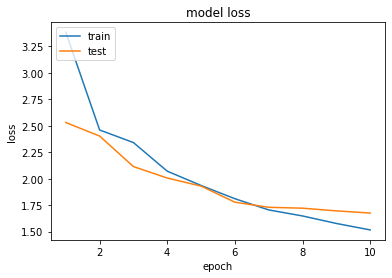

In [77]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-확인 결과 RNN모델기반의 방법은 57.08%의 accuracy를 가진 것으로 확인되었으며, 앙상블-보팅 방법보다 정확도가 떨어지는 것을 확인하였다.  
***
### 회고록  
생각보다 모델의 학습시간이 오랠 걸리는 것들이 있었다. 개인적으로 한줄로 여러데이터들을 처리해보고 싶어서 함수를 만들어서 사용했는데 오히려 그것이 학습시간을 오래 잡아먹는 것처럼 느껴졌다.  
또한 RNN모델을 학습시킬 때 계속되는 오류로 인해 커널을 껐다가 켜보기도하고 노트북을 껐다가 켜보기도 하였다.  
하지만 결론적으로는 학습시키는 데이터의 전처리가 문제가 되는 것이었고, 구글링을 통해 알게 된 [위키독스](https://wikidocs.net/22933)를 참고하여 학습을 마무리할 수 있었다.  
가벼운 마음으로 시작했다가 생각보다 무겁게 마무리를 짓게되었다.  
그래도 이런방법 저런방법들을 실험해 볼 수 있어서 의미가 있었다.  